# CAR PRICE PREDICTION

**Problem Statement:** 

    This dataset utilizes data scraped from website Olx.in with various features of used cars, in order to develop an algorithm that predicts the price of a used car based on several different indicators of success. There are 8 different features that will be used as the inputs to the machine learning and the output will be a value that represents the price of the car.

### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loaded .csv file and converted to dataframe.
df=pd.read_csv("car_data.csv")
df

DESCRIPTION   LOCATION  \
0                                 Maruti suzuki omni van  Bengaluru   
1      Skoda Rapid 1.5 Tdi Cr Ambition (make Year 201...  Bengaluru   
2                                 Hyundai Santro GL Plus  Bengaluru   
3      Chevrolet Beat Lt Petrol (make Year 2013) (pet...  Bengaluru   
4      Skoda Laura Elegance 2.0 Tdi Cr At (make Year ...  Bengaluru   
...                                                  ...        ...   
20000  Skoda Rapid Ambition 1.6 Tdi Cr Mt Plus (make ...      Delhi   
20001  Renault Duster 110 Ps Rxz Diesel Plus (make Ye...      Delhi   
20002     Mahindra Scorpio S10 (make Year 2015) (diesel)      Delhi   
20003                Ford Figo (make Year 2011) (diesel)      Delhi   
20004  Maruti Suzuki Swift Lxi 1.2 Bs-iv (make Year 2...      Delhi   

        MANUFACTURER        MODEL  YEAR FUEL TYPE  KMS DRIVEN      PRICE  
0      Maruti Suzuki         Omni  2010    Petrol     24000.0   210000.0  
1              Skoda        Rapid  2012    Diesel     53000.0   530000.0  
2            Hyundai  Santro Xing  2013    Petrol     25400.0   315000.0  
3          Chevrolet         Beat  2013    Petrol     26000.0   365000.0  
4              Skoda        Laura  2010    Diesel     89000.0   790000.0  
...              ...          ...   ...       ...         ...        ...  
20000          Skoda        Rapid  2013    Diesel     58000.0   450000.0  
20001        Renault       Duster  2014    Diesel     50000.0   875000.0  
20002       Mahindra      Scorpio  2015    Diesel     12000.0  1365000.0  
20003           Ford         Figo  2011    Diesel     36000.0   275000.0  
20004  Maruti Suzuki        Swift  2011      Petr         NaN        NaN  

[20005 rows x 8 columns]

### EDA (Exploratory Data Analysis)

In [3]:
# Name of the columns
df.columns

Index(['DESCRIPTION', 'LOCATION', 'MANUFACTURER', 'MODEL', 'YEAR', 'FUEL TYPE',
       'KMS DRIVEN', 'PRICE'],
      dtype='object')

In [4]:
df.drop('DESCRIPTION',axis = 1,inplace = True)

In [5]:
#Checking shape
df.shape

(20005, 7)

    There are 20,005 rows and 8 columns

In [6]:
#checking the datatype of each column
df.dtypes

LOCATION         object
MANUFACTURER     object
MODEL            object
YEAR              int64
FUEL TYPE        object
KMS DRIVEN      float64
PRICE           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20005 entries, 0 to 20004
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOCATION      20005 non-null  object 
 1   MANUFACTURER  20005 non-null  object 
 2   MODEL         20004 non-null  object 
 3   YEAR          20005 non-null  int64  
 4   FUEL TYPE     20005 non-null  object 
 5   KMS DRIVEN    20004 non-null  float64
 6   PRICE         20004 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [8]:
# Checking Null values
df.isnull().sum()

LOCATION        0
MANUFACTURER    0
MODEL           1
YEAR            0
FUEL TYPE       0
KMS DRIVEN      1
PRICE           1
dtype: int64

<AxesSubplot:>

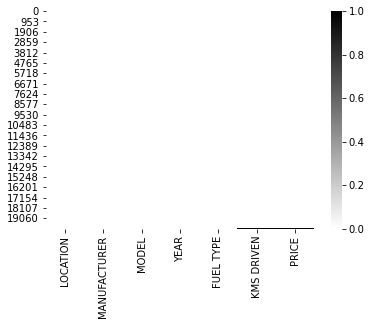

In [9]:
# Checking Null values by using heatmap
sns.heatmap(df.isnull(),cmap ='binary')

In [10]:
#splitting the data into two lists according to numerical and categorical features
Numerical_df = []
Categorical_df = []

for i in df:
    if ((df[i].dtypes=='int64')|(df[i].dtypes=='float')):
        Numerical_df.append(i)
    else:
        Categorical_df.append(i)

In [11]:
medianvalue = df['KMS DRIVEN'].median()
df['KMS DRIVEN'].fillna(medianvalue, inplace = True)

medianvalue = df['PRICE'].median()
df['PRICE'].fillna(medianvalue, inplace = True)

modevalue = df['MODEL'].mode()[0]
df['MODEL'].fillna(modevalue, inplace = True)

### DATA VISUALIZATION

Mumbai       4743
Bengaluru    4090
Chennai      3775
Hyderabad    3193
Kolkata      2502
Delhi        1702
Name: LOCATION, dtype: int64

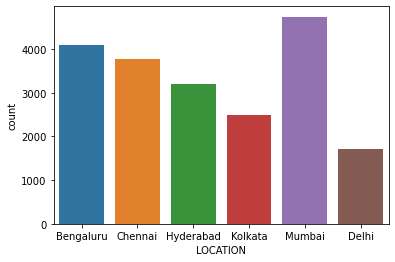

In [12]:
# count of the values based on LOCATION.
sns.countplot(df['LOCATION'])
df['LOCATION'].value_counts()

<AxesSubplot:ylabel='LOCATION'>

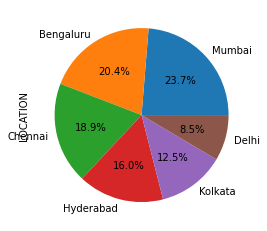

In [13]:
df['LOCATION'].value_counts().plot.pie(autopct='%1.1f%%')

    Car availability is higher at Mumbai and lowest at Delhi.  
    Bengaluru and chennai has comparable values, followed by Hyderabad and kolkata. 

Maruti Suzuki       4748
Hyundai             3376
Tata                2266
Toyota              1456
Mahindra            1388
Honda               1365
Chevrolet           1092
Ford                1005
Volkswagen           987
Skoda                583
Renault              353
Nissan               313
BMW                  302
Mercedes-Benz        300
Audi                 265
Fiat                 141
Mitsubishi            40
Mahindra Renault      18
Hindustan Motors       7
Name: MANUFACTURER, dtype: int64

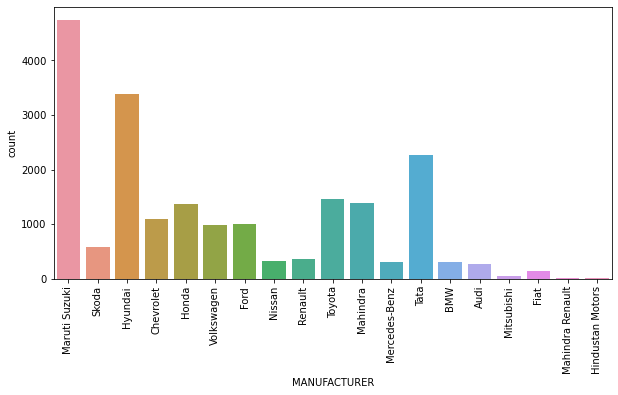

In [14]:
# count of the values based on MANUFACTURER.
plt.figure(figsize = (10,5))
sns.countplot(df['MANUFACTURER'])
plt.xticks(rotation = 90)
df['MANUFACTURER'].value_counts()

<AxesSubplot:ylabel='MANUFACTURER'>

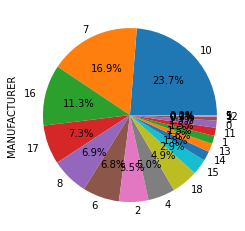

In [69]:
df['MANUFACTURER'].value_counts().plot.pie(autopct='%1.1f%%')

    Maruti Suzuki is the highest available model in market more than 4500 cars available.  
    Hyundai is second in line with more than 3500 cars followed by Tata numbers closed to 3000.  
    All others are very less available.

2011    4543
2012    4380
2010    3836
2013    3039
2014    2133
2015    1433
2016     637
2017       3
2020       1
Name: YEAR, dtype: int64

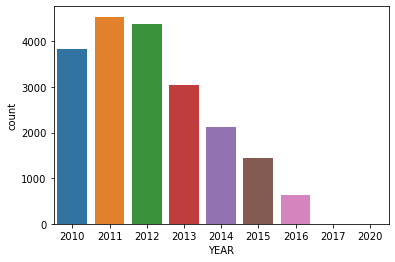

In [16]:
# count of the values based on YEAR.
sns.countplot(df['YEAR'])
df['YEAR'].value_counts()

<AxesSubplot:ylabel='YEAR'>

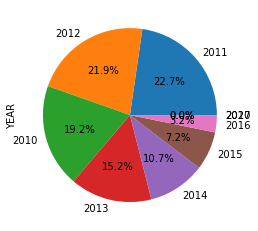

In [17]:
df['YEAR'].value_counts().plot.pie(autopct='%1.1f%%')

    2011 and 2012 are the most sold models, more than 4000 cars.   
    least availabe are the latest models 2015 and 2016.

Diesel           11701
Petrol            7458
CNG & Hybrids      763
LPG                 82
Petr                 1
Name: FUEL TYPE, dtype: int64

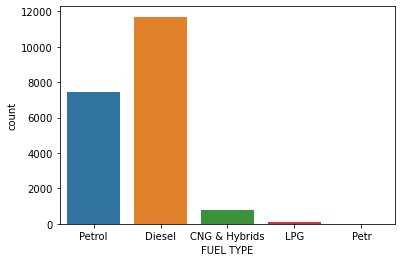

In [18]:
# count of the values based on FUEL TYPE.
sns.countplot(df['FUEL TYPE'])
df['FUEL TYPE'].value_counts()

<AxesSubplot:ylabel='FUEL TYPE'>

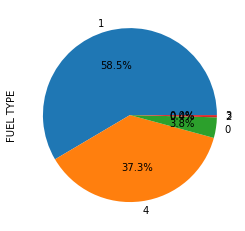

In [68]:
df['FUEL TYPE'].value_counts().plot.pie(autopct='%1.1f%%')

    Diesel cars are sold most though fuel price is lower compared to petrol.  
    CNG and LPG cars are least available in market.

**CHECKING FOR OUTLIERS**

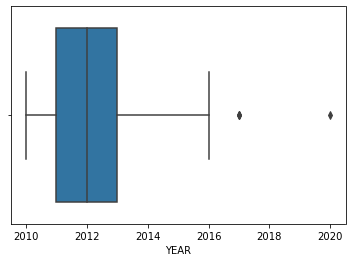

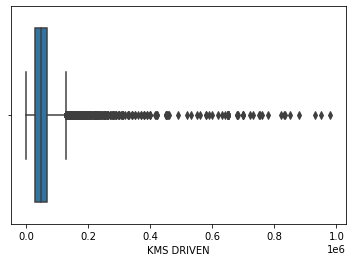

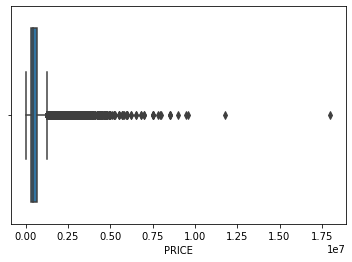

In [19]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

**CHECKING FOR SKEWNESS**

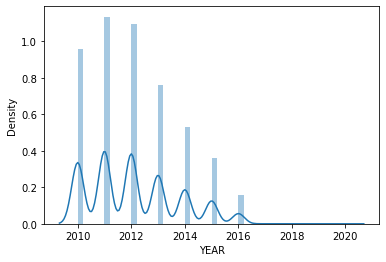

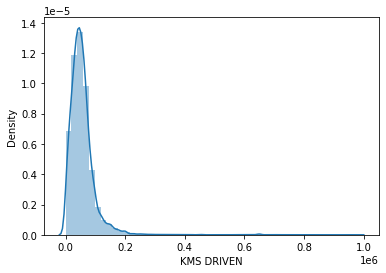

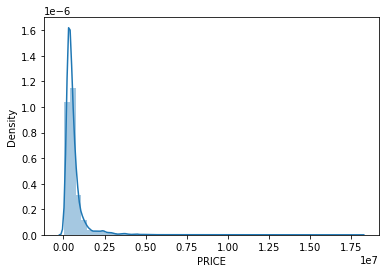

In [20]:
#checking wheather the columns are normally distributed or not

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='LOCATION', ylabel='PRICE'>

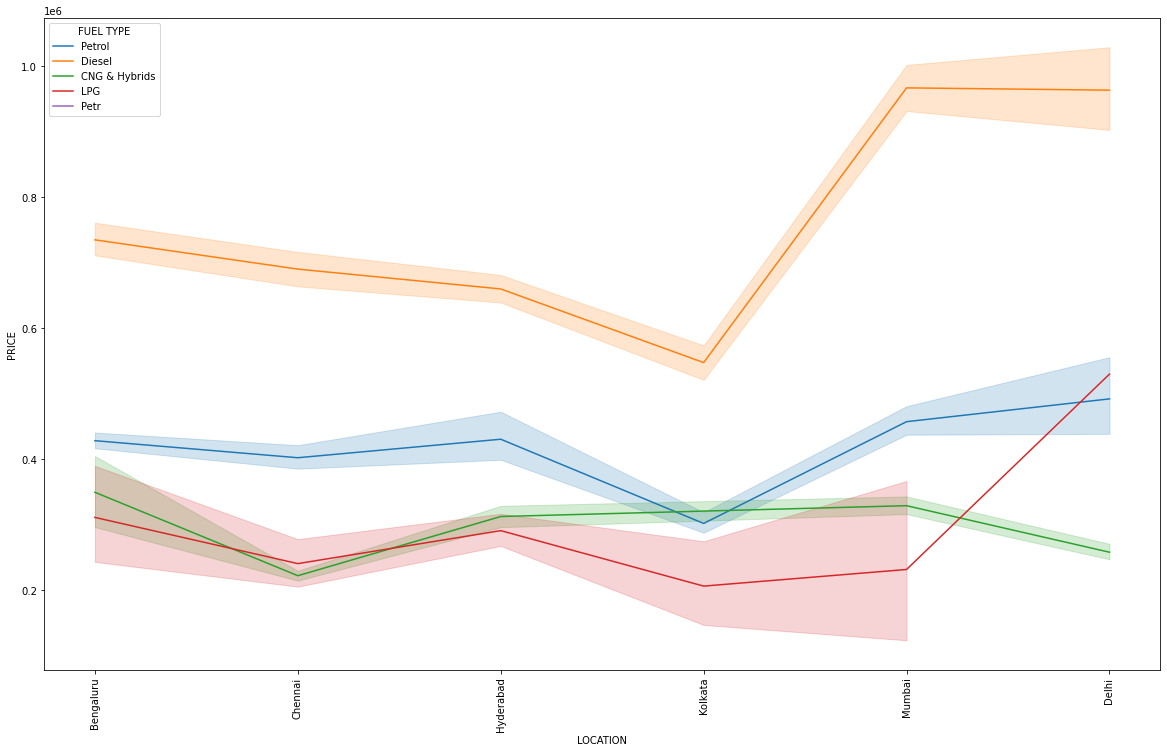

In [21]:
fig = plt.figure(figsize = (20,12))
plt.xticks(rotation = 90)
sns.lineplot(data = df, x ='LOCATION',y ='PRICE',hue = 'FUEL TYPE')

<AxesSubplot:>

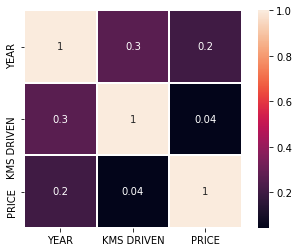

In [22]:
df_corr = df.corr().abs()
sns.heatmap(df_corr, annot = True,square = True,
           fmt='.1g', linewidth = 1)

In [23]:
df.columns

Index(['LOCATION', 'MANUFACTURER', 'MODEL', 'YEAR', 'FUEL TYPE', 'KMS DRIVEN',
       'PRICE'],
      dtype='object')

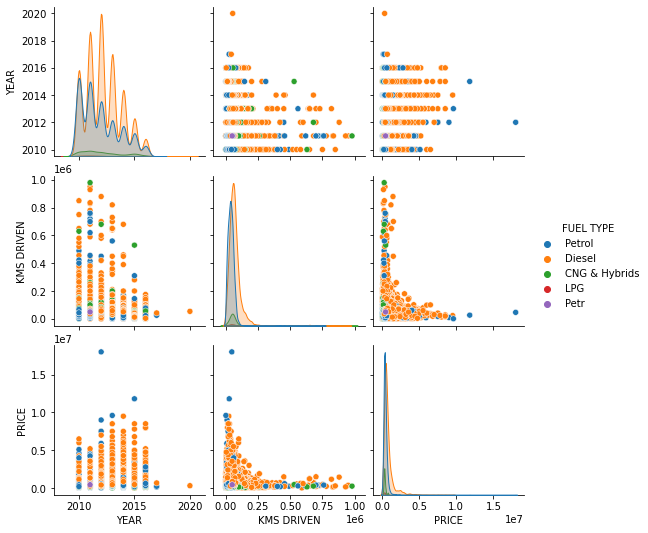

In [24]:
sns.pairplot(df,hue = 'FUEL TYPE')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_df:
    df[i] = le.fit_transform(df[i])
df

LOCATION  MANUFACTURER  MODEL  YEAR  FUEL TYPE  KMS DRIVEN      PRICE
0             0            10    122  2010          4     24000.0   210000.0
1             0            15    142  2012          1     53000.0   530000.0
2             0             7    152  2013          4     25400.0   315000.0
3             0             2     27  2013          4     26000.0   365000.0
4             0            15    107  2010          1     89000.0   790000.0
...         ...           ...    ...   ...        ...         ...        ...
20000         2            15    142  2013          1     58000.0   450000.0
20001         2            14     50  2014          1     50000.0   875000.0
20002         2             8    154  2015          1     12000.0  1365000.0
20003         2             4     69  2011          1     36000.0   275000.0
20004         2            10    165  2011          3     49000.0   450000.0

[20005 rows x 7 columns]

In [26]:
# Checking skewness
df.skew()

LOCATION        0.008582
MANUFACTURER    0.113466
MODEL           0.073295
YEAR            0.546871
FUEL TYPE       0.461736
KMS DRIVEN      6.537838
PRICE           5.506251
dtype: float64

### Removing Outliers

In [27]:
#finding boundary values
print('Highest allowed',df['YEAR'].mean()+3*df['YEAR'].std())
print('Highest allowed',df['KMS DRIVEN'].mean()+3*df['KMS DRIVEN'].std())

Highest allowed 2017.049478523105
Highest allowed 206082.00443301746


In [28]:
#Remove outliers
new_df = df[(df['YEAR']<2017)|(df['KMS DRIVEN']<472)]

In [29]:
# Checking skewness
new_df.skew()

LOCATION        0.008891
MANUFACTURER    0.113656
MODEL           0.073108
YEAR            0.541455
FUEL TYPE       0.461834
KMS DRIVEN      6.537335
PRICE           5.505935
dtype: float64

In [30]:
new_df['KMS DRIVEN']=np.sqrt(new_df['KMS DRIVEN'])

In [31]:
# Checking skewness
new_df.skew()

LOCATION        0.008891
MANUFACTURER    0.113656
MODEL           0.073108
YEAR            0.541455
FUEL TYPE       0.461834
KMS DRIVEN      1.246268
PRICE           5.505935
dtype: float64

### MODEL BUILDING

In [32]:
#SPLITTING AS TEST AND TRAIN DATA.
x=new_df.drop('PRICE', axis=1)
y=new_df['PRICE']

In [33]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [60]:
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.14721447663348852 on Random State 105


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_score of Random Forest: 0.8486659445832678
MAE: 79628.67898126472
MSE: 58459277464.6181
RMSE: 241783.53431244672


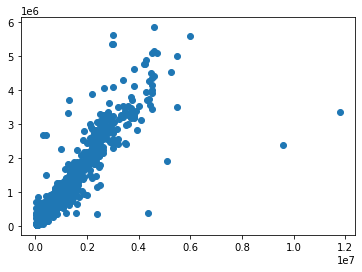

In [61]:
#Applying BaggingRegressor
br = BaggingRegressor()
br.fit(x_train,y_train)
predbr = br.predict(x_test)
BRR = r2_score(y_test,predbr)
print('R2_score of Random Forest:',BRR)
print('MAE:', metrics.mean_absolute_error(y_test, predbr))
print('MSE:', metrics.mean_squared_error(y_test, predbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predbr)))
plt.scatter(x=y_test,y=predbr)

R2_score of Random Forest: 0.8554543074930765
MAE: 75913.77149144419
MSE: 55836980786.040146
RMSE: 236298.49933091016


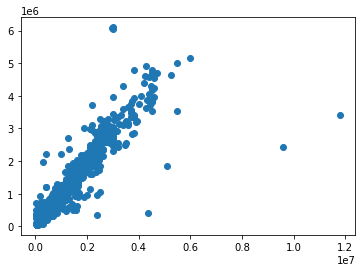

In [54]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

R2_score of KNN : 0.5187516409403934
MAE: 171130.67158568287
MSE: 185902844367.62106
RMSE: 431164.52123014606


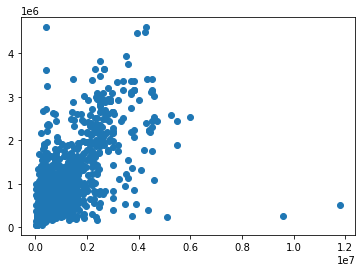

In [55]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

R2_score of GB : 0.7897865280592441
MAE: 140673.76941330612
MSE: 81203980486.38194
RMSE: 284963.1212742834


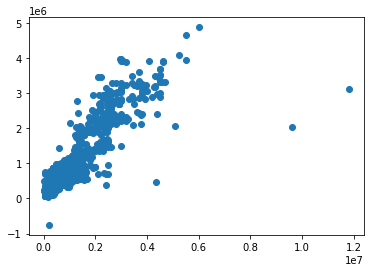

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predgb = GB.predict(x_test)
GBR = r2_score(y_test,predgb)
print('R2_score of GB :',GBR)
print('MAE:', metrics.mean_absolute_error(y_test, predgb))
print('MSE:', metrics.mean_squared_error(y_test, predgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predgb)))
plt.scatter(x=y_test,y=predgb)


R2_score of DT: 0.8237164424464742
MAE: 90413.49873834757
MSE: 68097094042.00721
RMSE: 260954.19912698705


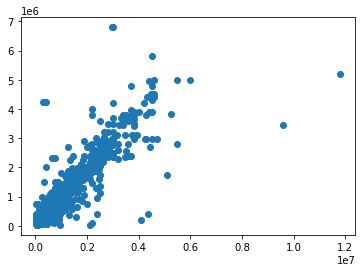

In [57]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

    - Since RandomForestRegressor is the best model in terms of model score, cross validation difference, test & train, r2 score difference, also as per the evaluation metrics, RandomForestRegressor to be the final model. Lets see if we can increase the score by using hyper parameter tuning.

### GridSearchCV

In [63]:
params = {'n_estimators': range(50,200,10),
          'criterion' : ['mse', 'mae'],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': range(5,30,6),
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

In [64]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomizedSearchCV(RandomForestRegressor(),params,n_iter = 10,cv=5, n_jobs= -1,random_state=maxRS)
rfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(5, 30, 6),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': range(50, 200, 10)},
                   random_state=105)

In [65]:
rfr.best_params_

{'n_estimators': 120,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 23,
 'criterion': 'mse'}

R2_score of Random Forest: 0.8345510481373637
MAE: 82435.34795274811
MSE: 63911762336.20392
RMSE: 252807.7576661838


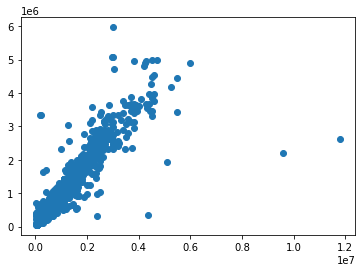

In [67]:
#Applying RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 120 , min_samples_split = 15, min_samples_leaf = 1, max_features = 'auto', max_depth = 23, criterion = 'mse')
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

### SAVING MODEL

In [62]:
import joblib
joblib.dump(rf,'Car_Price_Prediction_Project.pkl')

['Car_Price_Prediction_Project.pkl']

    - RandomForestRegressor is giving best result out of other model.